In [88]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import numpy as np, pandas as pd

def chi2(y,yfit):
    res = 0
    for i in range(len(yfit)):
        res = res + (y[i]-yfit[i])**2/(0.9724)**2 #The denominator should be the unbias Sipm voltage in mV
    return (res / len(yfit))

def waveform(x, C, start, m, end, A, d):
    condlist = [x < start, (x >= start) & (x < end), x >= end]
    funclist = [lambda x: C, lambda x: m*x+(C - m*start), lambda x: (A * np.exp(d * x) + (m*end + (C - m*start) - A * np.exp(d*end)))]
    return np.piecewise(x, condlist, funclist)

In [346]:
inputfile = "../TwofoldTrigger/5.txt"
outputfile = '../TwofoldTrigger/ORtrig300.txt'
filenumber = 1
channelnum = [1,2,3,4] #DRS4 board channel, ranges 1 to 4 -- should be expanded to do multiple channels at once.  
eventview = True

p0=[(0,100,1,110,300,-0.01),
    (0,100,1,110,300,-0.01),
    (0,100,1,110,40,-0.01),
    (0,100,1,110,40,-0.01)] #p0:C,start,m,end,A,d -- adjust start and end to match approx time of pulse falling edge
chi2cut = 2
Vcut = 10 #cut just above noise level, in (mV) 

channelnames=[]
for ch in channelnum:
    channelnames.append(f'ch{ch}')

Event Number 1
Channel 1 params: [ 1.03343900e+00  8.92052310e+01 -7.32884807e-02  1.07795748e+02
 -8.86678928e+00 -2.08122508e-02]
Channel 2 params: [-5.17954924e+00  1.00812988e+02  5.07039340e-01  1.03163813e+02
 -3.70199492e+00 -1.54309815e-02]
Channel 3 params: [ 4.77283077e-01  1.07877386e+02  4.45067200e-02  1.11408849e+02
  2.97008730e+00 -2.27176289e-04]
Channel 4 params: [ 5.25081840e-01  9.37486463e+01  1.16213886e-03  1.11913614e+02
  2.07346974e+01 -3.99840621e-05]


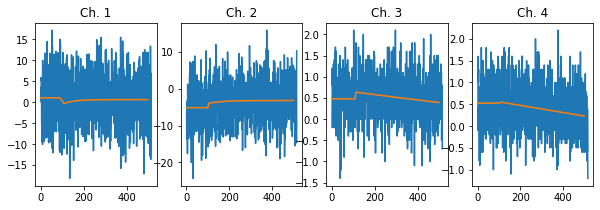

Event Number 2
Channel 1 params: [-2.85659337e+00  9.53457128e+01  8.78651289e+01  1.00209700e+02
  2.79754956e+03 -1.79574232e-02]
Channel 2 params: [-6.55677953e+00  6.08982467e+01  4.19360722e-02  7.69559524e+01
  1.21693562e+03 -1.08298705e-01]
Channel 3 params: [-4.17904995e+00  1.47635822e+02  2.35793513e+00  1.49075001e+02
  4.88152527e+02 -3.54007821e-02]
Channel 4 params: [-4.06947368e+00  1.01249438e+02  4.84578233e-02  9.90191703e+01
 -3.15321070e+02 -2.16914217e-06]


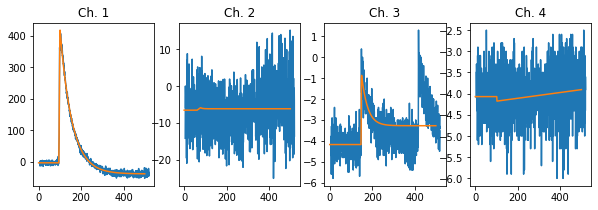

Event Number 3
Channel 1 params: [-2.67630058e+00  8.78759491e+01  4.95643023e+01  9.62402876e+01
  2.78628269e+03 -1.90712765e-02]
Channel 2 params: [-6.35951219e+00  1.03976733e+02  7.37910364e+00  1.13752744e+02
  1.28307239e+03 -2.56666650e-02]
Channel 3 params: [-4.37784431e+00  8.49764425e+01  1.74254826e+00  1.08722401e+02
  2.54675210e+02 -1.65929596e-02]
Channel 4 params: [-4.45397727e+00  8.96496127e+01  3.51369155e+00  9.69833514e+01
  1.28195791e+02 -1.64741366e-02]


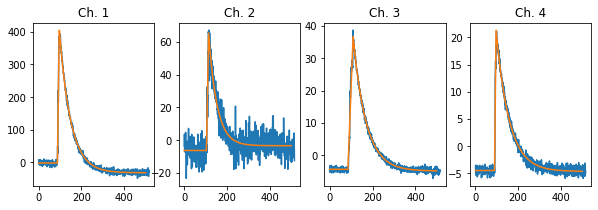

Event Number 4
Channel 1 params: [-4.63791821e+00  2.76943000e+02  1.98714638e-02  4.89635366e+02
 -3.47104668e+10 -4.12217911e-02]
Channel 2 params: [-4.68776649e+00  7.95504930e+01  2.27272151e+01  9.41211007e+01
  1.74571051e+03 -1.67726976e-02]
Channel 3 params: [-4.36120079e+00  9.46883550e+01 -1.24811635e-01  9.56961125e+01
 -7.12626116e+01 -5.94934642e-02]
Channel 4 params: [-4.65567010e+00  9.95094987e+01  4.65670882e+00  1.00960495e+02
  3.51627036e+01 -1.62485090e-02]


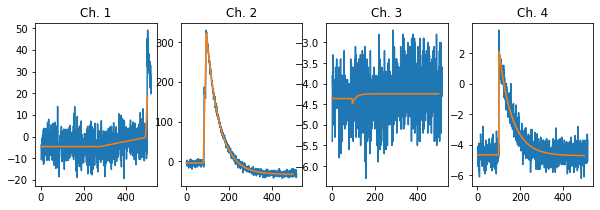

Event Number 5
Channel 1 params: [-1.10069587e+01  2.59298050e+02  4.84434471e-02  4.38575565e+02
  4.67420725e+02 -7.61634522e-02]
Channel 2 params: [-5.08323699e+00  9.12468699e+01  4.36193409e+01  1.03241051e+02
  3.19523493e+03 -1.66961997e-02]
Channel 3 params: [-4.17714286e+00  9.20464224e+01  2.17526290e+00  1.03671330e+02
  1.39551828e+02 -1.62918423e-02]
Channel 4 params: [-4.31955307e+00  9.42862375e+01  4.08045807e+00  1.02871335e+02
  1.80711461e+02 -1.57284907e-02]


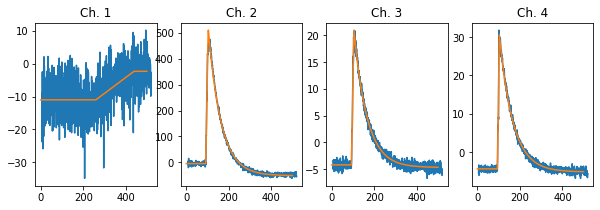

Event Number 6
Channel 1 params: [-3.61627905e+00  1.17479763e+02  1.80236513e-01  1.13279132e+02
 -2.19442913e+03 -2.88833762e-06]
Channel 2 params: [-3.75976331e+00  9.03212402e+01  6.90181791e+01  9.51096776e+01
  1.82588795e+03 -1.71405640e-02]
Channel 3 params: [-4.32826087e+00  1.22491367e+02  1.27200075e-01  1.20878500e+02
 -1.54220445e+01 -1.12714814e-04]
Channel 4 params: [-4.32602041e+00  1.05924629e+02  7.92941209e-02  1.04004108e+02
 -2.02567166e+02 -5.32437301e-06]


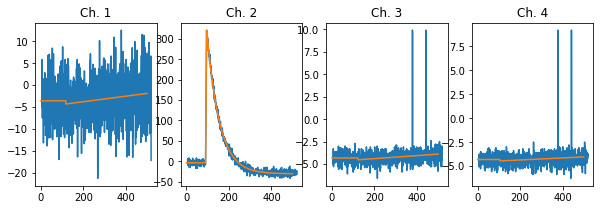

Event Number 7
Channel 1 params: [-3.82544379e+00  8.97432254e+01  6.25764675e+01  9.56272830e+01
  2.34233896e+03 -1.88426842e-02]
Channel 2 params: [-2.39884613e+00  1.03443195e+02 -1.69700385e+00  1.05400997e+02
 -3.97751768e+02 -4.47011068e-02]
Channel 3 params: [-4.30724456e+00  1.02878974e+02 -2.51930716e-01  1.03868627e+02
 -1.10469971e+00 -3.52885827e-03]
Channel 4 params: [-4.75360825e+00  1.02066371e+02 -2.28901782e-01  1.02211053e+02
 -2.58772477e+02 -4.49542668e-06]


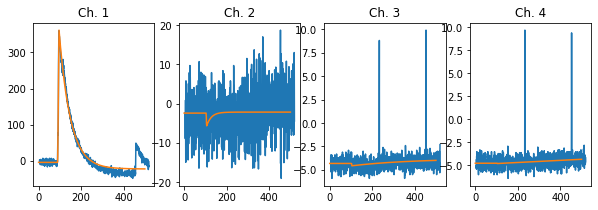

Event Number 8
Channel 1 params: [-1.13396814e+01  9.96890233e+01  2.48644210e-01  1.11818908e+02
  9.74284828e+01 -5.88917160e-02]
Channel 2 params: [-4.69261363e+00  9.34692615e+01  8.04033195e+01  9.80172202e+01
  2.06711197e+03 -1.68323066e-02]
Channel 3 params: [-3.86328247e+00  1.15834993e+02 -2.74753217e-02  1.60414254e+02
 -5.42066178e+01 -1.10123885e-04]
Channel 4 params: [-4.14153885e+00  1.15834990e+02 -2.33796271e-03  2.23776559e+02
 -9.54763699e+02 -3.09079680e-02]


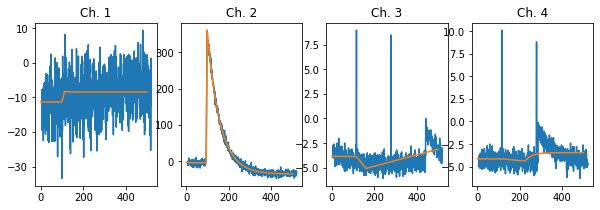

Event Number 9
Channel 1 params: [-9.07272727e+00  9.15515375e+01  3.80668459e+01  1.03863181e+02
  3.40337655e+03 -1.85840916e-02]
Channel 2 params: [-4.24566473e+00  9.00473467e+01  2.34411386e+01  1.10172531e+02
  3.26338494e+03 -1.67462467e-02]
Channel 3 params: [-4.72628571e+00  9.09909802e+01  3.83899359e+00  1.00677292e+02
  1.58557603e+02 -1.42938756e-02]
Channel 4 params: [-4.51602210e+00  9.39872499e+01  5.15122516e+00  9.97158998e+01
  1.11052068e+02 -1.31478845e-02]


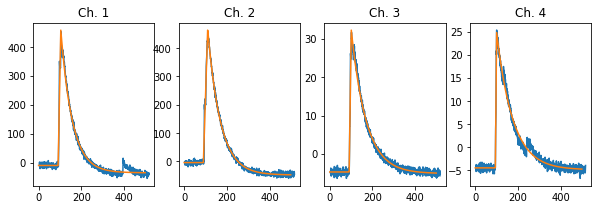

Done!
Total events analyzed: 9


In [347]:
din = {a+"_"+b:[] for a in channelnames for b in "P2P time chisq".split()}
#p2ps = np.array([])
#chisqs = np.array([])
with open(outputfile, 'w') as w:
    #w.write("")
    for i in range(0, filenumber):                             #iterate through files
        w.write(f"File {i}, Channel(s) {channelnum}")
        with open(inputfile) as f:                            #modify to iterate through chosen filenames
            current_file = (f.read().split('-- Event'))
        
        for j in range(1, 10):                  #iterate through events  
            
            time = np.array([])
            voltage = [np.array([])]*4
            lines = current_file[j].split('\n')
            #w.write(f"{j},")
            
            if eventview: #show the waveform fit line
                print(f"Event Number {j}")
                fig,ax = plt.subplots(1,4,figsize=(10,3))
                ax[0].set_title("Ch. 1")
                ax[1].set_title("Ch. 2")
                ax[2].set_title("Ch. 3")
                ax[3].set_title("Ch. 4")
            
            for line in lines[6:1028]:                         #iterate through data points
                values = line.split()
                time = np.append(time, float(values[2]))
                for channel in channelnum:
                    #if float(values[channelnum+2]) < Vcut: continue            #cut the false peaks from the DRS4
                    voltage[channel-1] = np.append(voltage[channel-1], float(values[channel+2]))
            w.write('\n')
            for channel in channelnum:
                #print(f'Channel Number {channel}')
                popt, pcov = curve_fit(waveform, time, voltage[channel-1],p0=p0[channel-1],
                                       maxfev = 100000)#,bounds=([-10,60,0,60,0,-1],[10,140,100,140,3000,0])
                
                for i in range(len(time)): 
                    if time[i] < popt[1]: startindex = i
                    else: break
                print(f"Event: {j}, Channel: {channel}, Start Index: {i}",end="\r")
                chisq = chi2(voltage[channel-1][0:startindex],waveform(time[0:startindex], *popt))

                din[f'ch{channel}_P2P'].append(popt[2]*(popt[3] - popt[1]))
                din[f'ch{channel}_time'].append(popt[1])
                din[f'ch{channel}_chisq'].append(chisq)
                
                w.write(f"{popt[2]*(popt[3] - popt[1]):.1f}\t")
                w.write(f"{popt[1]:.1f}\t")
                w.write(f"{chisq:.2f}\t")
                
                if eventview: #show the waveform fit line
                    print(f"Channel {channel} params: {popt}")
                    xs = []
                    ys = []
                    for i in range(500):
                        xs.append(i)
                        if i < popt[1]: ys.append(popt[0])
                        elif i < popt[3]: ys.append(i*popt[2]+popt[0]-popt[2]*popt[1])
                        else: ys.append(popt[4] * np.exp(popt[5] * i) + (popt[2]*popt[3] + (popt[0] - popt[2]*popt[1]) - popt[4] * np.exp(popt[5]*popt[3])))
                    ax[channel-1].plot(time,voltage[channel-1])
                    ax[channel-1].plot(xs,ys)
            plt.show()
                

print(f'Done!\nTotal events analyzed: {len(din["ch2_chisq"])}')
dfin = pd.DataFrame(din)

In [289]:
with open(outputfile) as f:  
    nevents = (f.read().split('\n'))
    nchannelnums = nevents[0].split('[')[1].split(']')[0].split(', ')
    nchannelnames=[]
    for ch in nchannelnums:
        nchannelnames.append(f'ch{ch}')
    dout = {a+"_"+b:[] for a in nchannelnames for b in "P2P time chisq".split()}
    
    for event in nevents[1:]:
        #print(f'Event: {event}')
        nvalues = event.split()
        if len(values) == 0: continue
        for i in range(len(nchannelnames)):
            #print(i)
            dout[f'{nchannelnames[i]}_P2P'].append(float(nvalues[3*i]))
            dout[f'{nchannelnames[i]}_time'].append(float(nvalues[3*i+1]))
            dout[f'{nchannelnames[i]}_chisq'].append(float(nvalues[3*i+2]))
dfout = pd.DataFrame(dout)


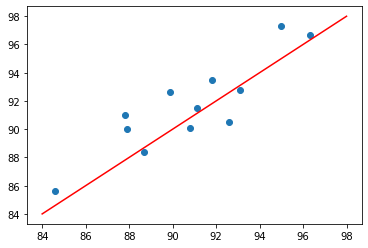

In [290]:
plt.scatter(dfout.query("ch3_P2P>10 & ch4_P2P>10").ch3_time,dfout.query("ch3_P2P>10 & ch4_P2P>10").ch4_time)
plt.plot(np.linspace(84,98,20),np.linspace(84,98,20),color="red")
plt.show()

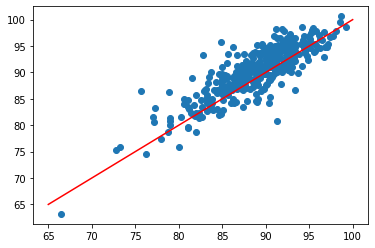

In [309]:
plt.scatter(dfin.query("ch3_P2P>10 & ch4_P2P>10").ch3_time,dfin.query("ch3_P2P>10 & ch4_P2P>10").ch4_time)
plt.plot(np.linspace(65,100,2),np.linspace(65,100,2),color="red")
plt.show()

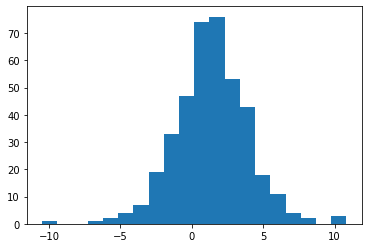

In [312]:
count,binedges,bars=plt.hist(dfin.query("ch3_P2P>10 & ch4_P2P>10").ch4_time-dfin.query("ch3_P2P>10 & ch4_P2P>10").ch3_time,20)

Actual Average: 1.39, Actual st.dev.: 2.58
Fit Average: 1.40,    Fit st.dev.: 2.24


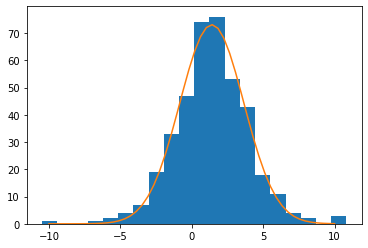

In [345]:
def gaus(x, const, mu, sigma):
    return const* np.exp(-0.5*((x - mu)/sigma)**2)

bincenters = binedges[1:]/2+binedges[:-1]/2
avg=0
stdev=0
for i in range(len(bincenters)):
    avg +=bincenters[i]*count[i]
avg = avg/sum(count)
for i in range(len(bincenters)):
    stdev +=(bincenters[i]-avg)**2*count[i]
stdev = np.sqrt(stdev/sum(count))


coeff, covar = curve_fit(gaus, bincenters, count)
print(f"Actual Average: {avg:.2f}, Actual st.dev.: {stdev:.2f}")
print(f"Fit Average: {coeff[1]:.2f},    Fit st.dev.: {-coeff[2]:.2f}")

plt.hist(dfin.query("ch3_P2P>10 & ch4_P2P>10").ch4_time-dfin.query("ch3_P2P>10 & ch4_P2P>10").ch3_time,20)
plt.plot(np.linspace(-10,10,50),gaus(np.linspace(-10,10,50),coeff[0],coeff[1],coeff[2]))
plt.show()

In [331]:
bincenters = binedges[1:]/2+binedges[:-1]/2


128.5674129524628
105.54288053244646
84.78829210627865
66.30364767395936
50.088947235488604
36.144190790866375
24.469378340092668
15.064509883167494
7.929585420090843
3.064604950862719
0.4695684754831221
0.1444759939520523
2.08932750626951
6.304123012435494
12.788862512450006
21.54354600631305
32.56817349402462
45.86274497558471
61.42726045099333
79.26171992025048
1.389463270128847 2.583943254278519


In [322]:
len(count)

20